<img src="images/þrýstisvæðið.png" alt="Title" width="900">


# Initial data processing 
Byrjum á efra kerfi 7.5 Bar inn á það frá Vatnsenda og 6.5 frá Rjúpnasölum fjólublátt

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:


# Replace 'your_file.xlsx' with the actual file path
df = pd.read_excel("data/Vatnsenda_EfraKerfi_Supply.xlsx")

# Display the first few rows
df.head()


,mpoint_id,mpoint_name,start_time,aggregate_name,aggregate_id,value,flag,quality_description,event_time
0,H-KOP-VE-RG20|ACT_VALUE,Vatnsendi - Framþrýstingur efra kerfi,2024-01-23 20:00:00,Average,4,78.44,0,"Good, Calculated ...",NaN
1,H-KOP-VE-RG20|OUT_VALUE,Vatnsendi - Framþrýstingur efra kerfi,2024-01-23 20:00:00,Average,4,78.44,0,"Good, Calculated ...",NaN
2,H-KOP-VE-TS212|VALUE,Vatnsendi - Hiti á framrennsli efra kerfis,2024-01-23 20:00:00,Average,4,80.00,0,"Good, Calculated ...",NaN
3,H-KOP-VE-RS212|VALUE,"Vatnsendi - Framrennsli efra kerfi, Vatnsenda",2024-01-23 20:00:00,Average,4,36.18,0,"Good, Calculated ...",NaN
4,H-KOP-VE-RG20|ACT_VALUE,Vatnsendi - Framþrýstingur efra kerfi,2024-01-22 23:00:00,Average,4,78.63,0,"Good, Calculated ...",NaN


Lets drop identifier which are always the same

In [9]:
df = df.drop(columns=["aggregate_name", "aggregate_id", "flag", "event_time", "quality_description"])
df.head()

,mpoint_id,mpoint_name,start_time,value
0,H-KOP-VE-RG20|ACT_VALUE,Vatnsendi - Framþrýstingur efra kerfi,2024-01-23 20:00:00,78.44
1,H-KOP-VE-RG20|OUT_VALUE,Vatnsendi - Framþrýstingur efra kerfi,2024-01-23 20:00:00,78.44
2,H-KOP-VE-TS212|VALUE,Vatnsendi - Hiti á framrennsli efra kerfis,2024-01-23 20:00:00,80.00
3,H-KOP-VE-RS212|VALUE,"Vatnsendi - Framrennsli efra kerfi, Vatnsenda",2024-01-23 20:00:00,36.18
4,H-KOP-VE-RG20|ACT_VALUE,Vatnsendi - Framþrýstingur efra kerfi,2024-01-22 23:00:00,78.63


In [10]:
# Handle missing time information by converting 'start_time' to datetime with error handling
df['start_time'] = pd.to_datetime(df['start_time'], errors='coerce')

# Filter the dataframe for 'H-KOP-VE-RG20|ACT_VALUE' and set the index
df_H_KOP_VE_RG20_ACT_VALUE = df[df['mpoint_id'] == 'H-KOP-VE-RG20|ACT_VALUE'].copy()

# Set 'start_time' as index and rename 'value' column
df_H_KOP_VE_RG20_ACT_VALUE.set_index('start_time', inplace=True)
df_H_KOP_VE_RG20_ACT_VALUE.rename(columns={'value': 'value'}, inplace=True)


In [11]:

df_H_KOP_VE_RG20_OUT_VALUE = df[df['mpoint_id'] == 'H-KOP-VE-RG20|OUT_VALUE'].copy()

# Set 'start_time' as index and rename 'value' column
df_H_KOP_VE_RG20_OUT_VALUE.set_index('start_time', inplace=True)
df_H_KOP_VE_RG20_OUT_VALUE.rename(columns={'value': 'value'}, inplace=True)


In [12]:

df_H_KOP_VE_RS212_VALUE = df[df['mpoint_id'] == 'H-KOP-VE-RS212|VALUE'].copy()

# Set 'start_time' as index and rename 'value' column
df_H_KOP_VE_RS212_VALUE.set_index('start_time', inplace=True)
df_H_KOP_VE_RS212_VALUE.rename(columns={'value': 'value'}, inplace=True)


In [13]:
df_H_KOP_VE_TS212_VALUE = df[df['mpoint_id'] == 'H-KOP-VE-TS212|VALUE'].copy()

# Set 'start_time' as index and rename 'value' column
df_H_KOP_VE_TS212_VALUE.set_index('start_time', inplace=True)
df_H_KOP_VE_TS212_VALUE.rename(columns={'value': 'value'}, inplace=True)


C:\Users\frodi\AppData\Local\Temp\ipykernel_4632\973979143.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


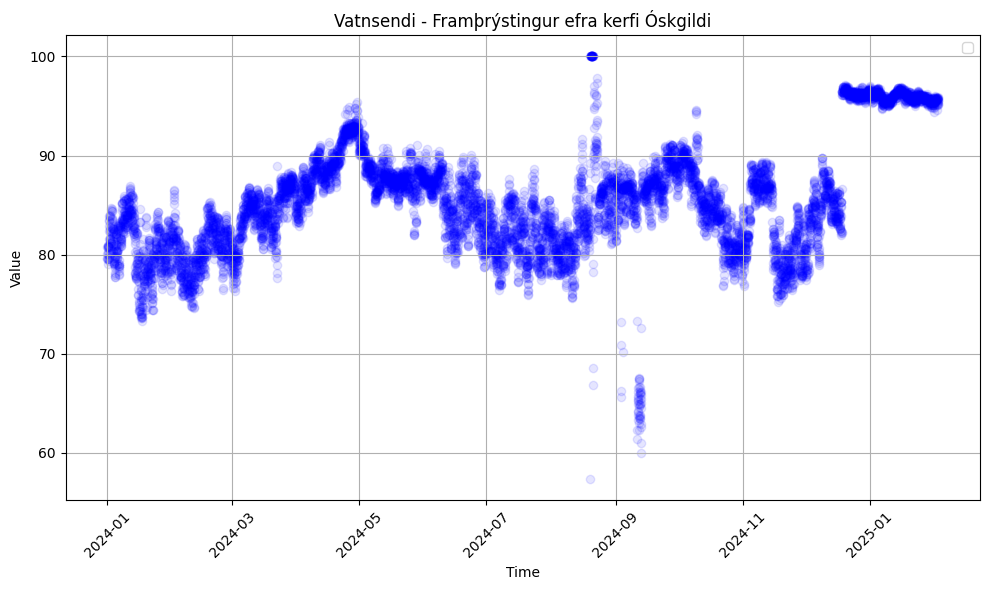

In [14]:

# Plot the dataframe
plt.figure(figsize=(10, 6))
plt.scatter(df_H_KOP_VE_RG20_ACT_VALUE.index, df_H_KOP_VE_RG20_ACT_VALUE['value'], marker='o', color='b',alpha = 0.1)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Vatnsendi - Framþrýstingur efra kerfi Óskgildi')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\frodi\AppData\Local\Temp\ipykernel_4632\1175155902.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


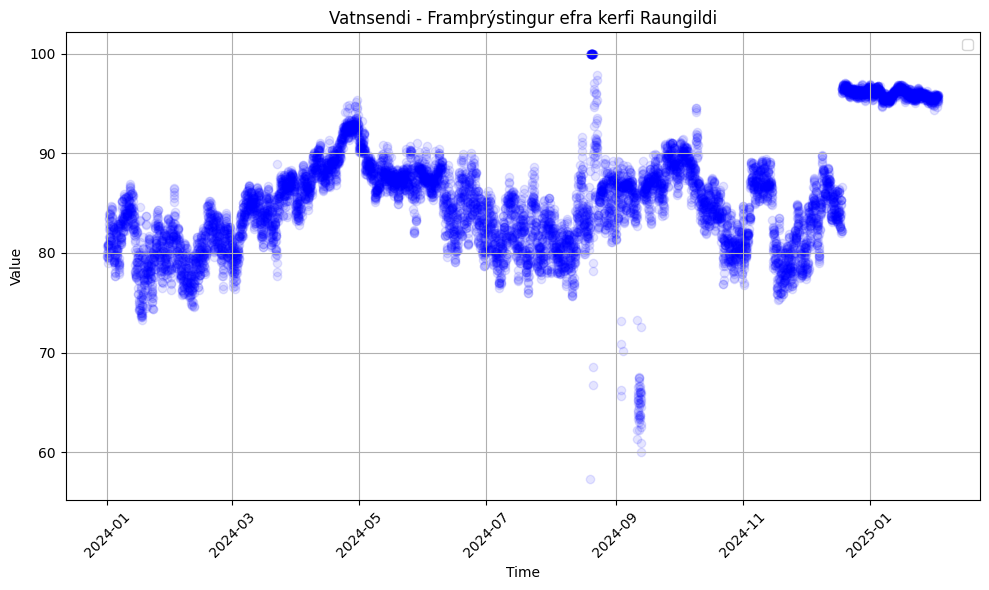

In [15]:
# Plot the dataframe
plt.figure(figsize=(10, 6))
plt.scatter(df_H_KOP_VE_RG20_OUT_VALUE.index, df_H_KOP_VE_RG20_OUT_VALUE['value'], marker='o', color='b',alpha = 0.1)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Vatnsendi - Framþrýstingur efra kerfi Raungildi')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\frodi\AppData\Local\Temp\ipykernel_4632\1378597298.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


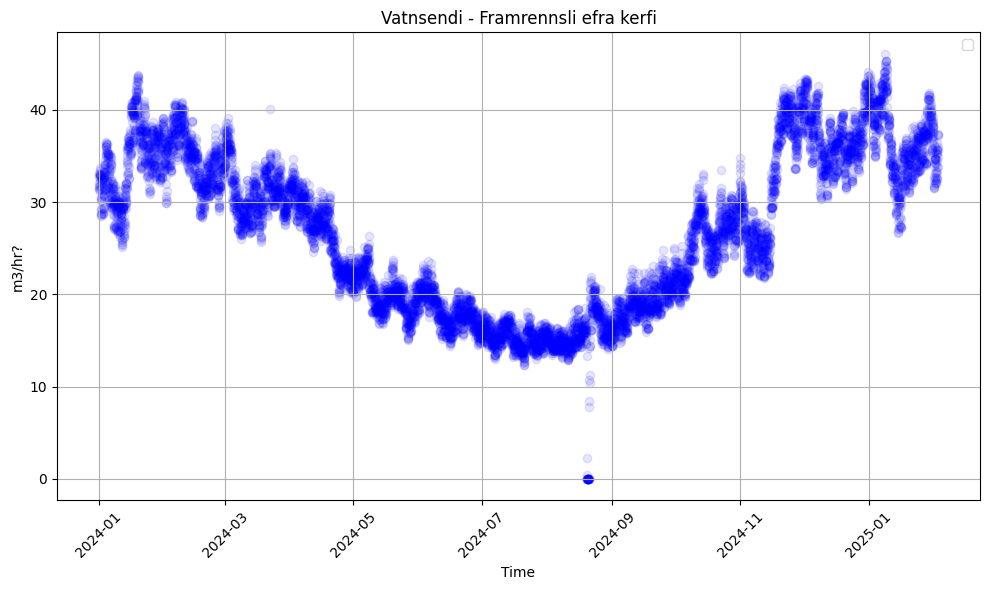

In [16]:
# Plot the dataframe
plt.figure(figsize=(10, 6))
plt.scatter(df_H_KOP_VE_RS212_VALUE.index, df_H_KOP_VE_RS212_VALUE['value'], marker='o', color='b',alpha = 0.1)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('m3/hr?')
plt.title('Vatnsendi - Framrennsli efra kerfi')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\frodi\AppData\Local\Temp\ipykernel_4632\2405719125.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


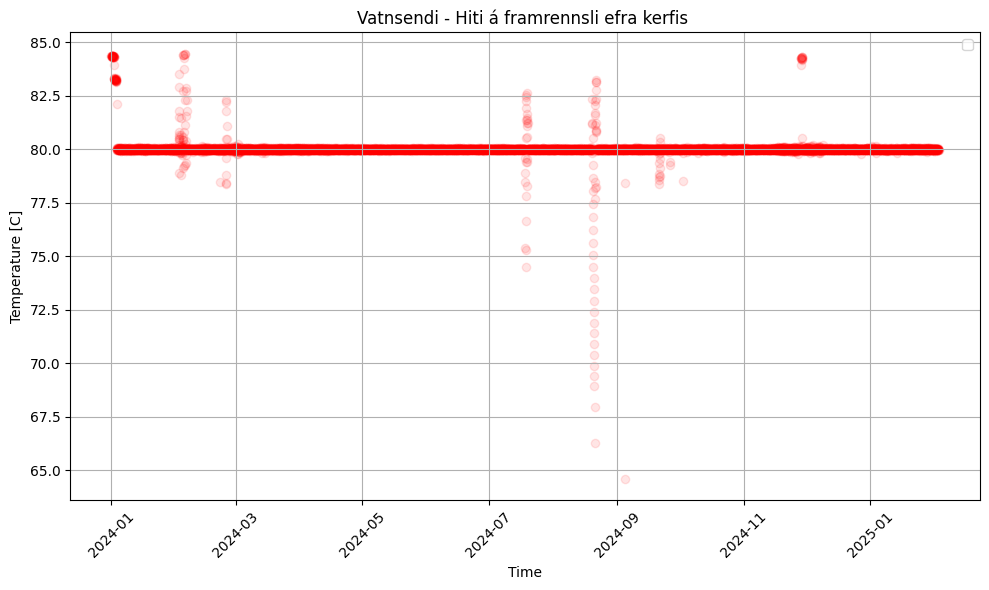

In [17]:
# Plot the dataframe
plt.figure(figsize=(10, 6))
plt.scatter(df_H_KOP_VE_TS212_VALUE.index, df_H_KOP_VE_TS212_VALUE['value'], marker='o', color='r',alpha = 0.1)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Vatnsendi - Hiti á framrennsli efra kerfis ')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
